In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data = pd.read_csv("climate_data_LDA_titles_filtered.csv", index_col=False)
df = pd.DataFrame(data)

In [21]:
print(pd.unique(df['outlet']))
print(len(pd.unique(df['outlet'])))

['The Guardian' 'Breitbart' 'HuffPost' 'NPR' 'Reuters' 'Fox News'
 'ABC News' 'USA Today' 'Politico' 'Slate' 'CNN' 'NBC News'
 'The New York Times' 'CBS News' 'Los Angeles Times' 'Chicago Tribune']
16


In [22]:
df

,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning,...,vader_polarity_neutral,vader_polarity_positive,vader_polarity_compound,gwsd_pred,vader_polarity_pred,textblob_polarity_pred,textblob_subjectivity_pred,firstp,scores,topic
0,39113103,2017-01-01 00:05:41,The Guardian,The moderate insurgency: A better world can em...,A backlash to a year of extremes and polarisat...,"After the events of 2016, foreseeing the year ...",Matthew Taylor,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.651,0.172,-0.0258,1,1,2,1,a backlash to a year of extremes and polarisat...,"{'climate impact': 0.5624255537986755, 'climat...",7
1,38945556,2017-01-01 07:00:49,The Guardian,"Brexit, Trump, and bad news for Labour: our re...","As the new year dawns, share your hopes and fe...",What kind of year will 2017 be? In terms of po...,James Walsh;Guardian Readers,www.theguardian.com,https://www.theguardian.com/news/2017/jan/01/b...,LEFT,...,0.741,0.000,-0.5423,1,0,0,1,as the new year dawns share your hopes and fe...,"{'climate impact': 0.33482301235198975, 'clima...",7
2,4282690,2017-01-01 08:25:51,Breitbart,Rules for Righties -- a War-Winning Manifesto ...,2016 was a great year for most of us - but jus...,\n2016 was a great year for most of us ÃÂ¢ÃÂ...,James Delingpole,www.breitbart.com,http://www.breitbart.com/london/2017/01/01/201...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,2016 was a great year for most of us but jus...,"{'climate impact': 0.49600180983543396, 'clima...",7
3,39038266,2017-01-01 17:00:01,The Guardian,The BBCÃÂ¢ÃÂÃÂs Planet Earth II did not h...,Producers claim such series encourage conserva...,It has been wonderful watching Planet Earth II...,Martin Hughes-Games,www.theguardian.com,https://www.theguardian.com/commentisfree/2017...,LEFT,...,0.673,0.000,-0.5216,0,0,2,0,producers claim such series encourage conserva...,"{'climate impact': 0.7899065017700195, 'climat...",4
4,3933475,2017-01-01 23:05:38,HuffPost,"Climate Change This Week: Vanishing Life, Sola...","Today, the Earth got a little hotter, and a li...","Today, the Earth got a little hotter, and a li...",Mary Ellen Harte;Biologist,www.huffingtonpost.com,http://www.huffingtonpost.com/mary-ellen-harte...,LEFT,...,1.000,0.000,0.0000,0,1,2,0,today the earth got a little hotter and a li...,"{'climate change': 0.9899488091468811, 'climat...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,3876703,2019-08-30 18:59:25,HuffPost,Hundreds Of Young People Strike In Front Of UN...,Teen climate activist Greta Thunberg joined th...,NEW YORK ÃÂ¢ÃÂÃÂ Hundreds of young people...,Senior Reporter,www.huffpost.com,https://www.huffpost.com/entry/united-nations-...,LEFT,...,0.880,0.000,-0.1280,1,0,2,0,teen climate activist greta thunberg joined th...,"{'climate change': 0.9895257353782654, 'climat...",4
11304,4342931,2019-08-30 22:17:30,Breitbart,Alexandria Ocasio-Cortez Unveils Green New Dea...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Rep. Alexandria Ocasio-Cortez (D-NY) released ...,Kyle Morris,www.breitbart.com,https://www.breitbart.com/politics/2019/08/30/...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,rep alexandria ocasio cortez d ny released ...,"{'climate impact': 0.8118867874145508, 'climat...",7
11305,4309962,2019-08-31 06:05:23,Breitbart,Climate Change Will Produce ÃÂ¢ÃÂÃÂPowerf...,The U.N. High Commissioner on Human Rights war...,"The U.N. High Commissioner on Human Rights, Mi...",Thomas D. Williams,www.breitbart.com,https://www.breitbart.com/environment/2019/08/...,RIGHT,...,1.000,0.000,0.0000,1,1,1,0,the u n high commissioner on human rights war...,"{'climate change': 0.99802166223526, 'climate ...",5
11306,4331363,2019-08-31 19:05:37,Breitbart,China Claims Trade War Hinders Efforts to Cont...,Communist China claims its trade war with the ...,The Chinese Ministry of Ecology and Environmen...,John Hayward,www.breitbart.com,https://www.breitbart.com/national-security/20...

[[150, 478, 32, 108, 37, 42, 0, 123, 36, 90, 2, 42, 165, 38, 1, 9], [220, 664, 143, 151, 50, 646, 0, 120, 54, 126, 7, 80, 238, 77, 214, 47], [113, 313, 61, 67, 42, 132, 0, 50, 18, 76, 20, 27, 57, 31, 119, 34], [315, 757, 116, 139, 108, 187, 0, 145, 43, 141, 60, 56, 19, 109, 182, 84], [71, 721, 224, 151, 104, 154, 0, 103, 40, 95, 22, 16, 22, 79, 171, 101], [60, 343, 127, 120, 88, 113, 7, 88, 23, 91, 73, 54, 35, 9, 112, 80]]


/tmp/ipykernel_212/1679604540.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


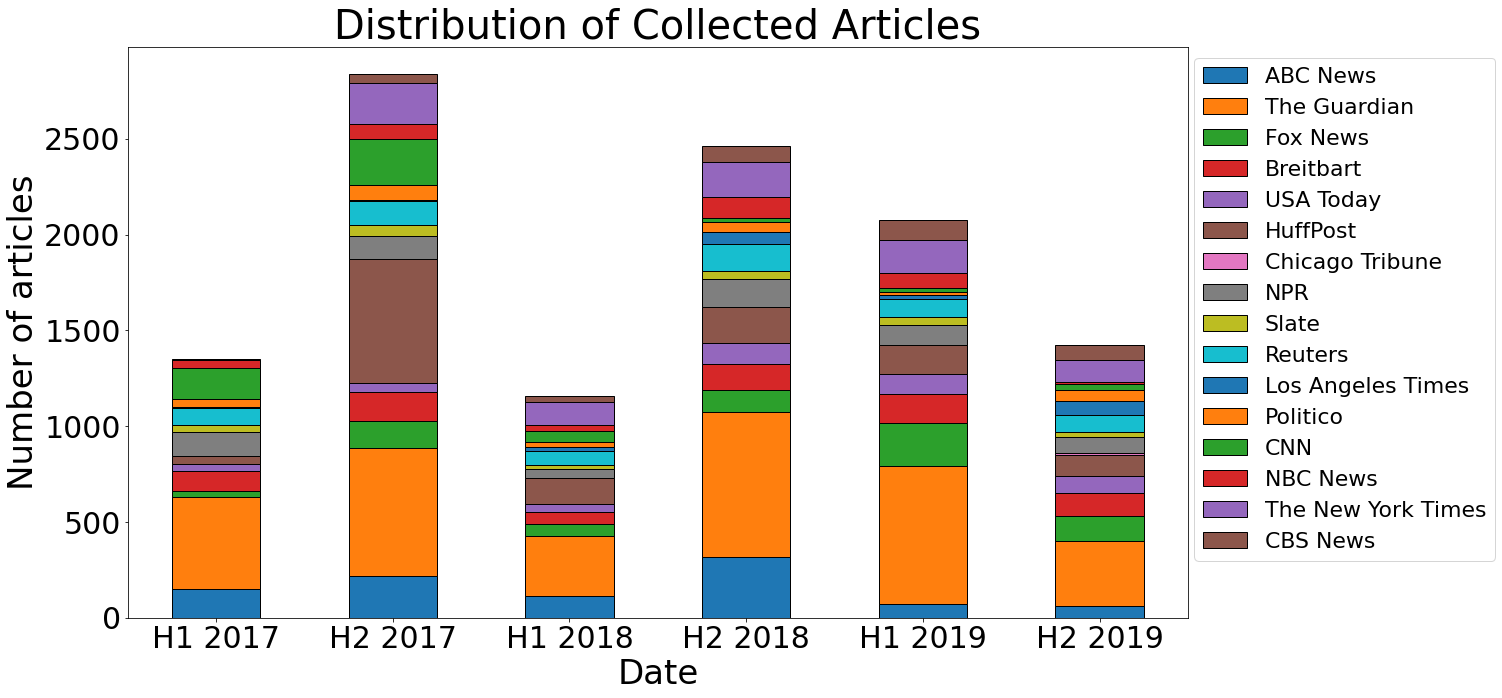

In [26]:
outlets = ['ABC News', 'The Guardian', 'Fox News', 'Breitbart', 'USA Today', 'HuffPost',
 'Chicago Tribune', 'NPR', 'Slate', 'Reuters', 'Los Angeles Times', 'Politico',
 'CNN', 'NBC News', 'The New York Times', 'CBS News']
dates = ['2017-01-01 00:00:00', '2017-06-01 00:00:00', '2018-01-01 00:00:00', '2018-06-01 00:00:00', '2019-01-01 00:00:00', '2019-06-01 00:00:00', '2020-01-01 00:00:00']

def count_articles(df):
    date_counts=[]
    for date_index, date_element in enumerate(dates):
        outlet_counts=[]
        try:
        
            for outlet in outlets:
                outlet_counts.append(len(df[(df['outlet'] == outlet) & (date_element <= df['date_publish']) & (df['date_publish'] < dates[date_index + 1])]))

        except IndexError: 
            break
        date_counts.append(outlet_counts)
    return date_counts 

counts = count_articles(df)
print(counts)

    
count_df = pd.DataFrame(counts)
#axs = count_df.plot(kind='bar', stacked=True)

dates = ['H1 2017','H2 2017','H1 2018','H2 2018','H1 2019','H2 2019']


fig, axes = plt.subplots()
labels = [item.get_text() for item in axes.get_xticklabels()]
labels = dates
count_df.plot(kind='bar', stacked=True, ax=axes, edgecolor='black')
axes.set_ylabel("Number of articles", fontsize=34)
axes.set_xlabel("Date", fontsize=34)
axes.set_xticklabels(labels, rotation=0, fontsize=30)
plt.yticks(fontsize=30)

plt.title("Distribution of Collected Articles", fontsize=40) 
fig.set_size_inches(19, 10.5)
plt.legend(outlets, fontsize=22, bbox_to_anchor=(1.3,1))
fig.show()
plt.savefig('collected_article_dist.png', facecolor='white', bbox_inches='tight')

#df['outlet']

In [12]:
counts_T = list(map(list, zip(*counts[0:6])))

def plot_bars = 
plt.bar(dates, counts_T[0], color='red')
plt.bar(dates, counts_T[1], bottom=counts_T[0], color='blue')
plt.bar(dates, counts_T[0], color='red')
plt.bar(dates, counts_T[1], bottom=counts_T[0], color='blue')
plt.show()

SyntaxError: invalid syntax (2367620148.py, line 3)

In [13]:
counts_T

#plt.plot(counts_T[0], dates, color='red')
#plt.plot(counts_T[1], dates, color='blue')

NameError: name 'counts_T' is not defined

Text(0.5, 0, 'Hey')

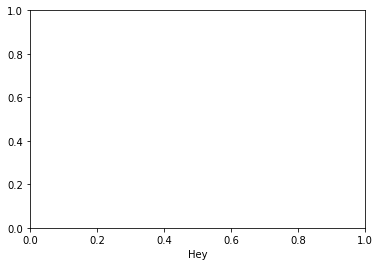

In [14]:
plt.xlabel("Hey")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

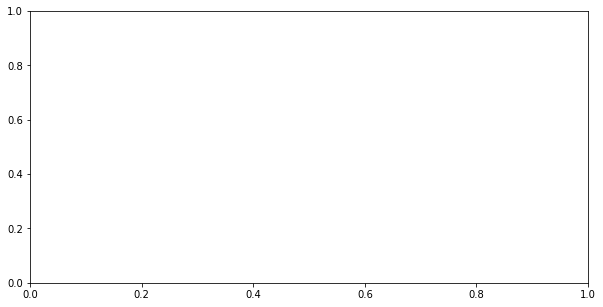

In [15]:
# Numbers of pairs of bars you want
N = 14

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')

plt.xlabel('Here goes x-axis label')
plt.ylabel('Here goes y-axis label')
plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3', 'Xtick3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')